In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_parquet("yellow_tripdata_2023-01.parquet")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df.sample()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
717049,2,2023-01-09 10:34:19,2023-01-09 10:37:07,2.0,0.47,1.0,N,50,163,1,5.1,0.0,0.5,2.73,0.0,1.0,11.83,2.5,0.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [9]:
df["passenger_count"].fillna(df["passenger_count"].mode()[0],inplace=True)

In [10]:
df["passenger_count"].isnull().sum()

0

In [11]:
df["RatecodeID"].value_counts()

RatecodeID
1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

In [12]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0],inplace=True)

In [13]:
ratio = df["RatecodeID"].value_counts().values/df["RatecodeID"].shape[0]

In [14]:
ratio

array([9.49224036e-01, 3.72506412e-02, 4.90516720e-03, 4.27355723e-03,
       2.92099234e-03, 1.42364954e-03, 1.95645837e-06])

In [15]:
df["RatecodeID"].mode()

0    1.0
Name: RatecodeID, dtype: float64

In [16]:
df["RatecodeID"].isnull().sum()

0

In [17]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.5    2744268
 0.0     231037
-2.5      19718
Name: count, dtype: int64

<Axes: xlabel='fare_amount', ylabel='Count'>

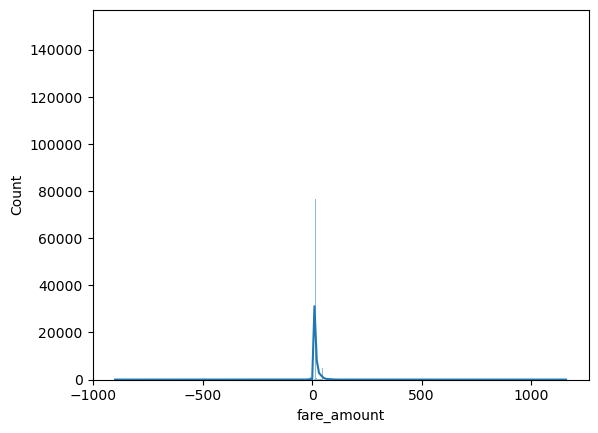

In [33]:
sns.histplot(data=df,x="fare_amount",kde=True)

<Axes: xlabel='fare_amount'>

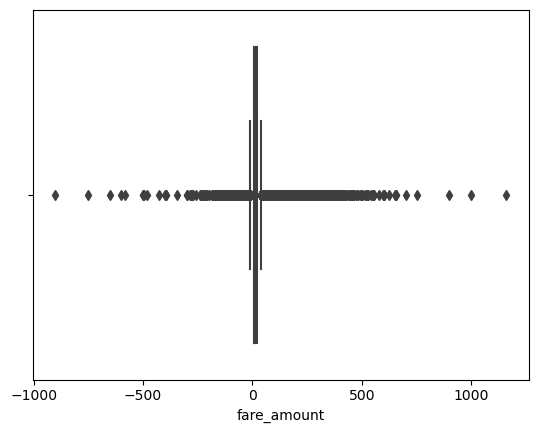

In [34]:
sns.boxplot(x="fare_amount",data=df)

In [20]:
df["airport_fee"].value_counts()

airport_fee
 0.00    2730456
 1.25     260960
-1.25       3607
Name: count, dtype: int64

In [21]:
df["store_and_fwd_flag"]

0             N
1             N
2             N
3             N
4             N
           ... 
3066761    None
3066762    None
3066763    None
3066764    None
3066765    None
Name: store_and_fwd_flag, Length: 3066766, dtype: object

In [22]:
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0],inplace=True)

In [23]:
df["store_and_fwd_flag"].isnull().sum()

0

In [24]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [25]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.5    2744268
 0.0     231037
-2.5      19718
Name: count, dtype: int64

In [26]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0],inplace=True)

In [27]:
df["congestion_surcharge"].isnull().sum()

0

In [28]:
df["airport_fee"].value_counts()

airport_fee
 0.00    2730456
 1.25     260960
-1.25       3607
Name: count, dtype: int64

In [29]:
df["airport_fee"].fillna(df["airport_fee"].mode()[0],inplace=True)

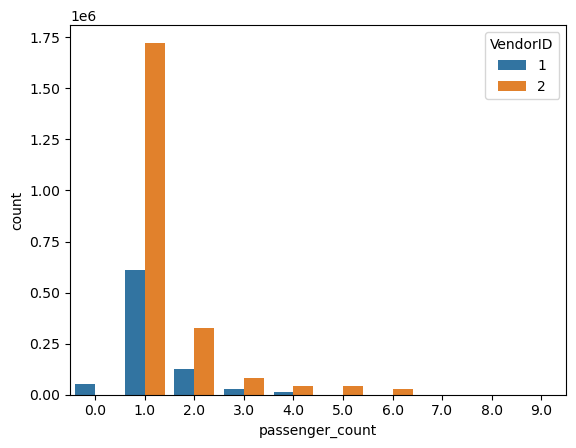

In [30]:
sns.countplot(data=df, x="passenger_count",hue="VendorID")  
plt.show()

<Axes: xlabel='VendorID', ylabel='count'>

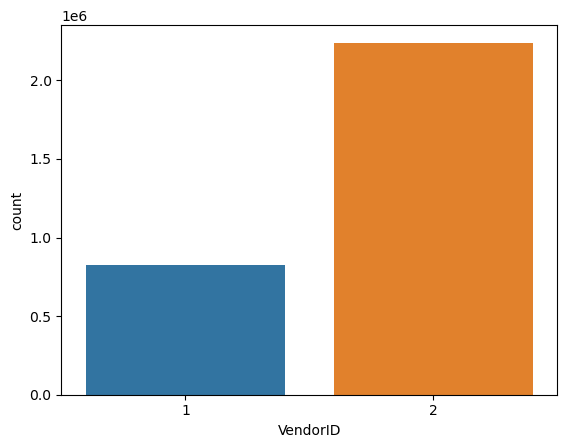

In [31]:
sns.countplot(data=df, x="VendorID")

In [32]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164096,2023-01-17 00:38:06.427873792,1.354051e+00,3.847342e+00,1.485803e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.279513e+00,1.048959e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.249999872,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.872699e-01,2.495838e+02,6.399026e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.635268e-01,3.518413e-01


In [35]:
df.sample(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2302529,2,2023-01-25 08:10:13,2023-01-25 08:16:47,1.0,1.23,1.0,N,170,234,2,8.6,0.0,0.5,0.0,0.0,1.0,12.6,2.5,0.0


In [41]:
df["pickup_time"] = df["tpep_pickup_datetime"].dt.hour

In [42]:
df["drop_time"] = df["tpep_dropoff_datetime"].dt.hour

In [57]:
pickup_time = df["pickup_time"].value_counts()

In [60]:
drop_time = df["drop_time"].value_counts()

<Axes: xlabel='pickup_time'>

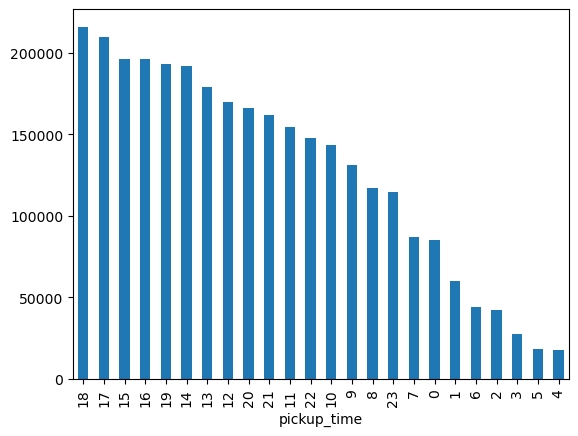

In [58]:
pickup_time.plot(kind="bar")

<Axes: xlabel='drop_time'>

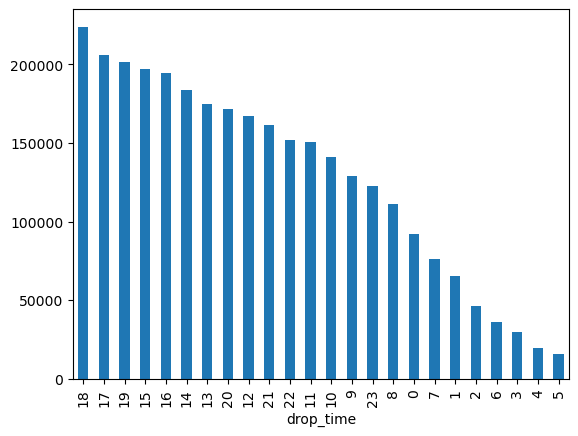

In [61]:
drop_time.plot(kind="bar")

<Axes: xlabel='total_amount', ylabel='Count'>

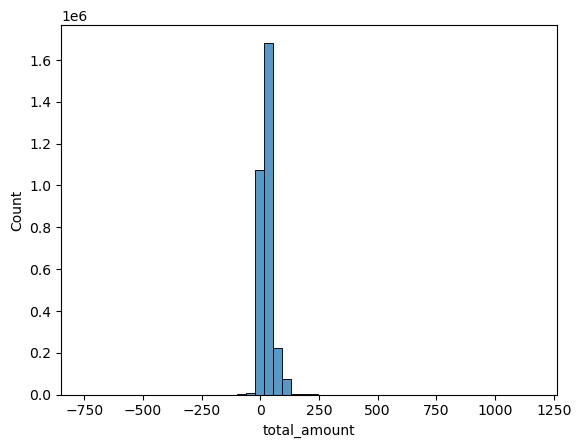

In [70]:
sns.histplot(data=df,x="total_amount",bins=50)

<Axes: xlabel='payment_type'>

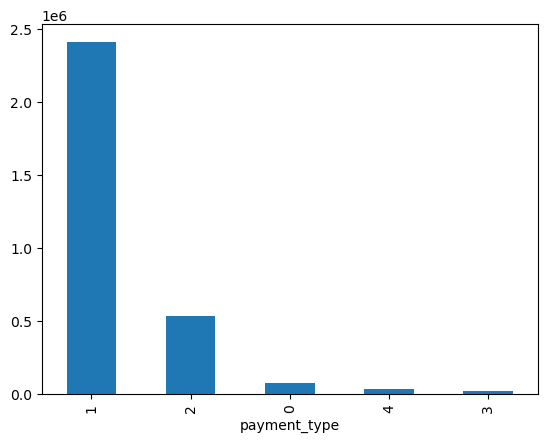

In [77]:
df["payment_type"].value_counts().plot(kind="bar")

In [76]:
df["fare_amount"].describe()

count    3.066766e+06
mean     1.836707e+01
std      1.780782e+01
min     -9.000000e+02
25%      8.600000e+00
50%      1.280000e+01
75%      2.050000e+01
max      1.160100e+03
Name: fare_amount, dtype: float64

<Axes: xlabel='payment_type'>

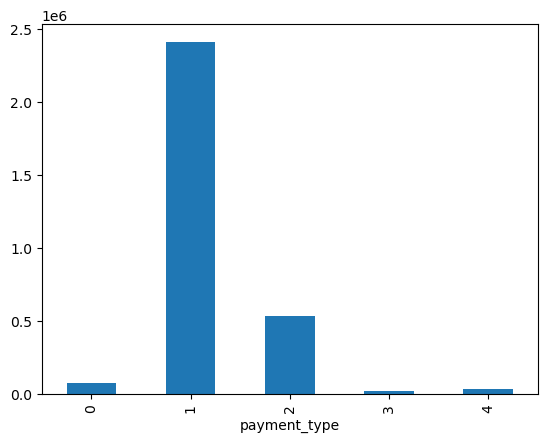

In [105]:
df.groupby("payment_type")["fare_amount"].count().plot(kind="bar",fill=True)